In [1]:
import pandas as pd
import numpy as np

'''
    Task,
    Algorithm,
    Heuristic,
    Actions,
    Expansions,
    Goal Tests,
    New Nodes,
    Node,
    Time,
'''
header = ['Task','Algorithm','Heuristic','Actions','Expansions','Goal Tests','New Nodes','Node','Time']
f = open("search_result.txt", "r")
lines = f.readlines()
search_result = []
for line in lines:
    line_split = line.split('\t')
    search_result.append([line_split[0], line_split[1], line_split[2],
        int(line_split[3][0:10].strip(' ')), int(line_split[3][10:20].strip(' ')), 
        int(line_split[3][20:32].strip(' ')), int(line_split[3][32:].strip(' ')),
        int(line_split[4]), round(float(line_split[5]), 4)])

search_result_df = pd.DataFrame(search_result, columns=header)
search_result_df

,Task,Algorithm,Heuristic,Actions,Expansions,Goal Tests,New Nodes,Node,Time
0,Air Cargo Problem 1,breadth_first_search,,20,43,56,178,6,0.0036
1,Air Cargo Problem 1,depth_first_graph_search,,20,21,22,84,20,0.0022
2,Air Cargo Problem 1,uniform_cost_search,,20,60,62,240,6,0.0060
3,Air Cargo Problem 1,greedy_best_first_graph_search,h_unmet_goals,20,7,9,29,6,0.0009
4,Air Cargo Problem 1,greedy_best_first_graph_search,h_pg_levelsum,20,6,8,28,6,0.2675
5,Air Cargo Problem 1,greedy_best_first_graph_search,h_pg_maxlevel,20,6,8,24,6,0.2039
6,Air Cargo Problem 1,greedy_best_first_graph_search,h_pg_setlevel,20,6,8,28,6,0.9140
7,Air Cargo Problem 1,astar_search,h_unmet_goals,20,50,52,206,6,0.0057
8,Air Cargo Problem 1,astar_search,h_pg_levelsum,20,28,30,122,6,0.7120
9,Air Cargo Problem 1,astar_search,h_pg_maxlevel,20,43,45,180,6,0.8314


In [2]:
indexes = [e for e in range(0, 27)] + [33, 34, 35, 36, 37, 40, 41]
search_result_df = search_result_df[search_result_df.index.isin(indexes)]

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

### Analyze the search complexity as a function of domain size, search algorithm, and heuristic.

Text(0.5, 1.0, 'Problems 1-2. Expanded nodes')

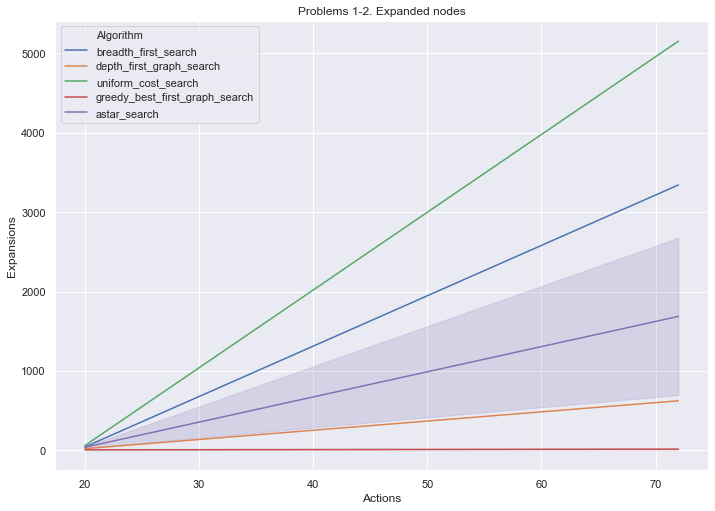

In [27]:
sns.lineplot(x="Actions", y="Expansions", 
             hue="Algorithm",
             data=search_result_df[0:22]).set_title("Problems 1-2. Expanded nodes")

Expanded nodes chart shows steep growth of the complexity with incresed number of actions. Only two algorithms Greedy Best First Search and Depth First Search were able to get trought the problem without consuming large amount of memory. This explained by the fact that f = h helped GBFS to expand only nodes on it's shortest route to the goal and DFS has lowest O(bm) space complexity amongst all algorithms. 

Text(0.5, 1.0, 'Uninformed search. Expanded nodes')

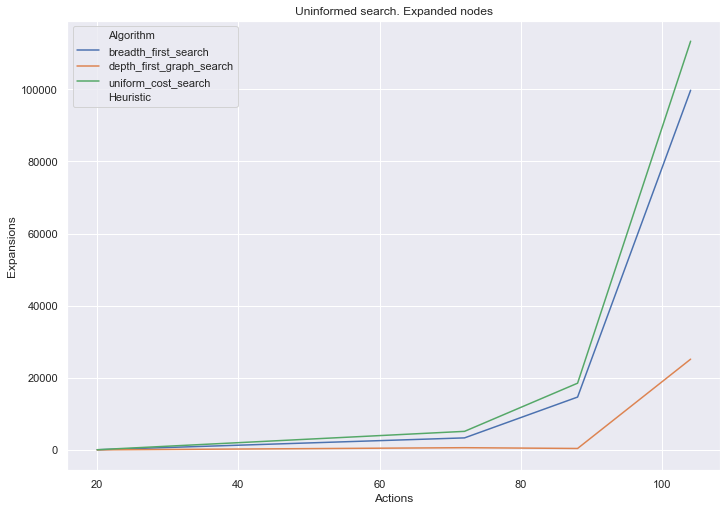

In [18]:
sns.lineplot(x="Actions", y="Expansions",
             hue="Algorithm", style='Heuristic', 
             data=search_result_df[(search_result_df['Heuristic'] == '')]).set_title("Uninformed search. Expanded nodes")

Space complexity turns to be growing exponentially solving problems 3 and 4. Again DFS has best performance amongst all uninformed search algorithms.

Text(0.5, 1.0, 'Informed search. Expanded nodes')

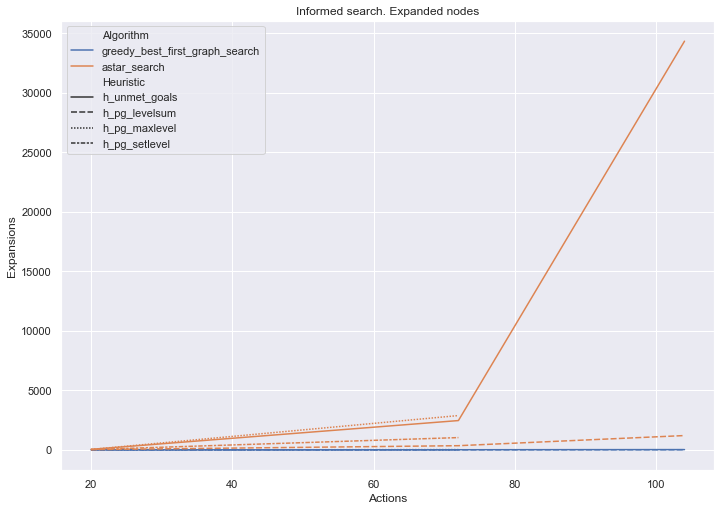

In [20]:
sns.lineplot(x="Actions", y="Expansions",
             hue="Algorithm", style='Heuristic', 
             data=search_result_df[(search_result_df['Algorithm'] == 'greedy_best_first_graph_search') | (search_result_df['Algorithm'] == 'astar_search')]).set_title("Informed search. Expanded nodes")


The space complexity of the A* algorithms depends on the used heuristic. A* with LevelSum heuristic performs significantly better then UnmetGoals. GDFS is still outperforming A* because it expands the nodes on the solution path only.

### Analyze search time as a function of domain size, search algorithm, and heuristic.

Text(0.5, 1.0, 'Problems 1-2. Runtime')

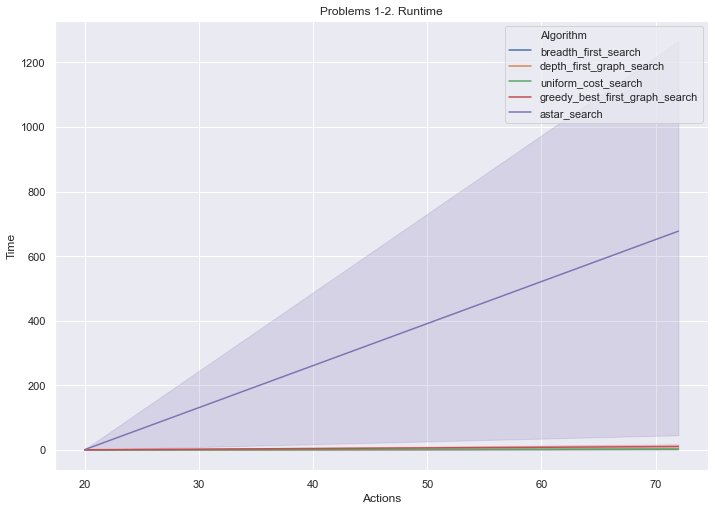

In [21]:
sns.lineplot(x="Actions", y="Time",
             hue="Algorithm",
             data=search_result_df[0:22]).set_title("Problems 1-2. Runtime")

Computation complexity is not an issue when solving problems 1 and 2. The only algorithm which didn't manage to complete in reasonable time is A* with expensive MaxLevel and SetLevel heuristics (LevelSum is performing better but unable to catch up with uninformed search algorithms). 

Text(0.5, 1.0, 'Uninformed search. Runtime')

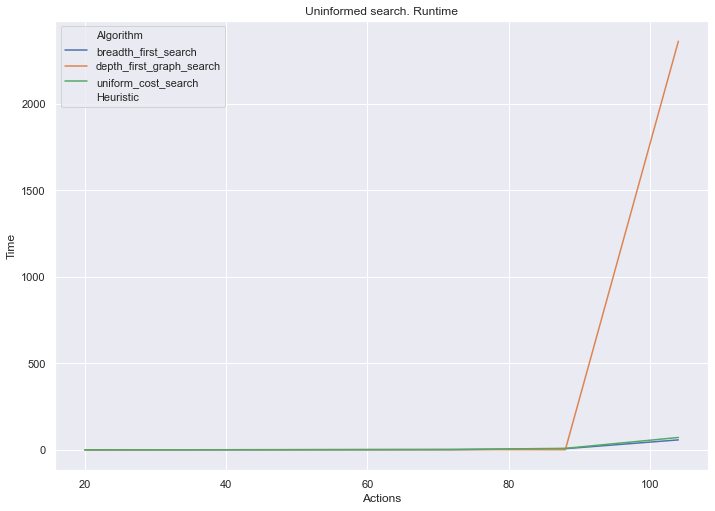

In [22]:
sns.lineplot(x="Actions", y="Time",
             hue="Algorithm", style='Heuristic', 
             data=search_result_df[(search_result_df['Heuristic'] == '')]).set_title("Uninformed search. Runtime")

Breadth First Search and Uniform Cost Search show similar runtime performance due the fixed step cost of all our problems. Depth First Search is strugling to solve problem 4.

Text(0.5, 1.0, 'Informed search. Runtime')

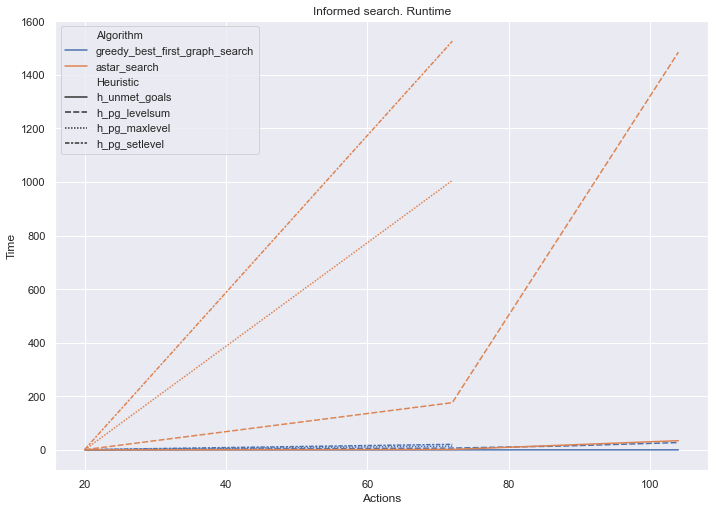

In [23]:
sns.lineplot(x="Actions", y="Time",
             hue="Algorithm", style='Heuristic', 
             data=search_result_df[(search_result_df['Algorithm'] == 'greedy_best_first_graph_search') | (search_result_df['Algorithm'] == 'astar_search')]).set_title("Informed search. Runtime")

Problem 3 is hard for A*, thus using heuristics MaxLevel, SetLevel and potentially LevelSum to solve Problem 4 is not feasible. Greedy Best First search performs well because it expands the nodes on the solution path only.

### Analyze the optimality of solution as a function of domain size, search algorithm, and heuristic.

Text(0.5, 1.0, 'Problems 1-2. Optimality')

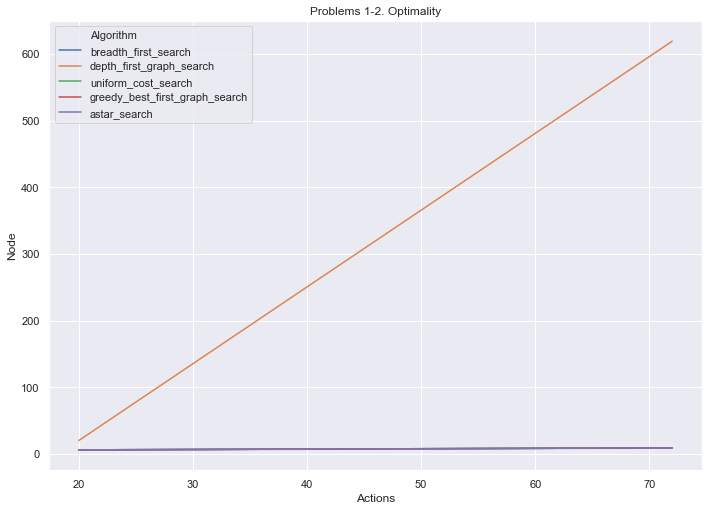

In [25]:
sns.lineplot(x="Actions", y="Node",
             hue="Algorithm",
             data=search_result_df[0:22]).set_title("Problems 1-2. Optimality")

The only algorithm failed to find optimal solution is Depth First Search. Indeed DFS is not complete nor optimal and should not be used to solve problems with strict requirements on found solution. Another non optimal algorithm Greedy Best First Search was able to find an optimal solution for the first two problems, however we may see it failing on more complex problems.

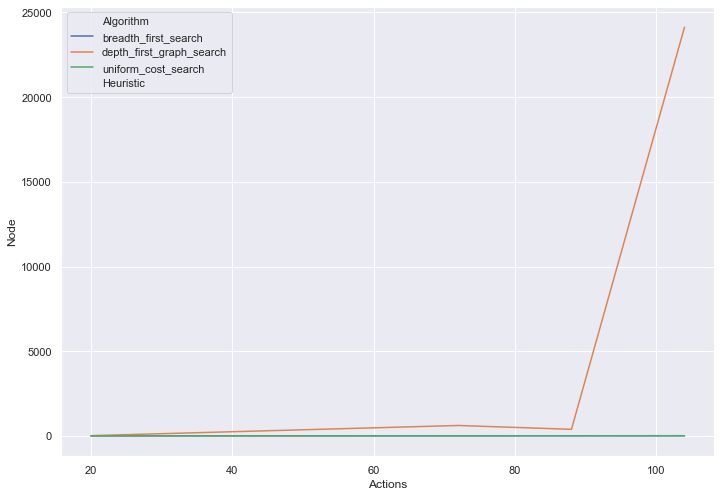

In [11]:
sns.lineplot(x="Actions", y="Node",
             hue="Algorithm", style='Heuristic', 
             data=search_result_df[(search_result_df['Heuristic'] == '')]).set_title("Uninformed search. Optimality")

Uninformed Cost Search is optimal and has no problem finding optimal solution for all 4 problems. Breadth First Search is not optimal in general, however it becomes optimal for the problems with constant step cost. Thus BFS is able to find the solution for all our problems,.

Text(0.5, 1.0, 'Informed search. Optimality')

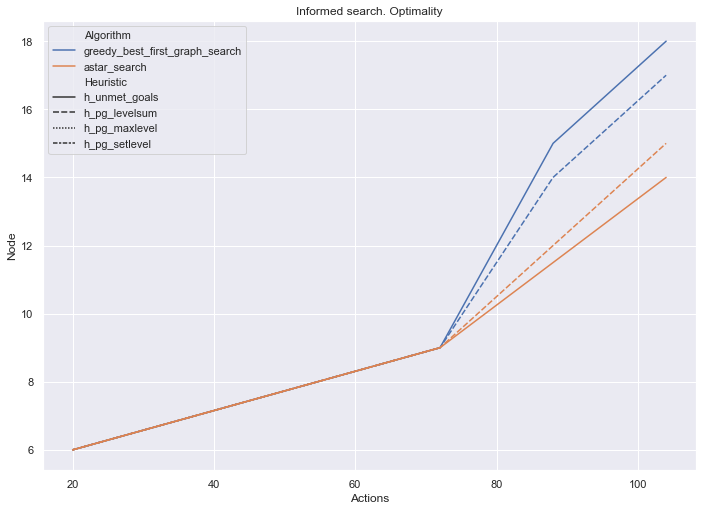

In [24]:
sns.lineplot(x="Actions", y="Node",
             hue="Algorithm", style='Heuristic', 
             data=search_result_df[(search_result_df['Algorithm'] == 'greedy_best_first_graph_search') | (search_result_df['Algorithm'] == 'astar_search')]).set_title("Informed search. Optimality")

Proper choice of heuristic function is the key for informed search algorithms to find the optimal solution. A* search managed to find optimal solution for all problems with Unmet_Goals heuristic. As expected Greedy Best First Search algorithm failed to find optimal solution for the problems regardless of used heuristic, thus the result may be applicable when solving certain problems which don't require exact solution but close one.

### Which algorithm or algorithms would be most appropriate for planning in a very restricted domain (i.e., one that has only a few actions) and needs to operate in real time?

In general any algorithm can be used for planning in a very restricted domain. However, it is important to know whether the required solution has to be optimal or not as DFS won't be a good choice to find an optimal solution. Using informed search would require high-performance heuristic in order to generate a solution in real-time. My list of algorithms would be:
1. Breadth First Search (only for constant step cost)
2. A* with cheap heristic (e.g. Unmet Goals)
3. Uniformed Cost Search

### Which algorithm or algorithms would be most appropriate for planning in very large domains (e.g., planning delivery routes for all UPS drivers in the U.S. on a given day)

The space complexity of the algorith must be minimal in order for it to be used in very large domains. Only two algorithms are capable to manage it generally: Depth First Search due to it's low space complexity O(bm) and Greedy Best First Search because it expands only nodes on it's shortest path to the goal. But main choice would be domain specific implementation of A* with good heuristic. 

### Which algorithm or algorithms would be most appropriate for planning problems where it is important to find only optimal plans?

In its general for Uniform Cost Search algorithm is the only one that delivers optimal plan. A* search is optimal with good heuristic. Breadth First Search is optimal with constant step cost. Other algorithms are not optimal and shouldn't be used for such problems